<a href="https://colab.research.google.com/github/arumm25/Repo1-PenambanganData/blob/main/Repository6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
path = '/content/drive/MyDrive/Penambangan Data/Social_Network_Ads.csv'
df = pd.read_csv(path)

In [4]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [5]:
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [8]:
k = 5

In [9]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

distances = []

for i in range(len(X_train)):
    dist = euclidean_distance(X_test[0], X_train[i])
    distances.append((dist, y_train.iloc[i]))

In [10]:
distances = sorted(distances, key=lambda x: x[0])
distances[:5]

[(np.float64(0.19643894811861096), np.int64(1)),
 (np.float64(0.34516103885446503), np.int64(1)),
 (np.float64(0.35768752759254335), np.int64(1)),
 (np.float64(0.4019340151690169), np.int64(0)),
 (np.float64(0.4314512985680812), np.int64(1))]

In [11]:
neighbors = distances[:k]
neighbors

[(np.float64(0.19643894811861096), np.int64(1)),
 (np.float64(0.34516103885446503), np.int64(1)),
 (np.float64(0.35768752759254335), np.int64(1)),
 (np.float64(0.4019340151690169), np.int64(0)),
 (np.float64(0.4314512985680812), np.int64(1))]

In [12]:
labels = [label for (_, label) in neighbors]
labels

[np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1)]

In [13]:
from collections import Counter

prediction = Counter(labels).most_common(1)[0][0]
prediction

np.int64(1)

In [14]:
knn = KNeighborsClassifier(
    n_neighbors=k,
    metric='euclidean'
)

knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [15]:
y_pred = knn.predict(X_test)

In [16]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy KNN:", acc)

Accuracy KNN: 0.9


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        51
           1       0.84      0.90      0.87        29

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



In [18]:
confusion_matrix(y_test, y_pred)

array([[46,  5],
       [ 3, 26]])

menentukan nilai K terbaik

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"k = {k} | Accuracy = {acc:.4f}")

k = 1 | Accuracy = 0.8500
k = 2 | Accuracy = 0.8375
k = 3 | Accuracy = 0.9000
k = 4 | Accuracy = 0.9125
k = 5 | Accuracy = 0.9000
k = 6 | Accuracy = 0.9000
k = 7 | Accuracy = 0.9000
k = 8 | Accuracy = 0.9000
k = 9 | Accuracy = 0.9000
k = 10 | Accuracy = 0.9000
k = 11 | Accuracy = 0.9000
k = 12 | Accuracy = 0.9000
k = 13 | Accuracy = 0.9000
k = 14 | Accuracy = 0.9000
k = 15 | Accuracy = 0.9000
k = 16 | Accuracy = 0.9125
k = 17 | Accuracy = 0.9125
k = 18 | Accuracy = 0.9000
k = 19 | Accuracy = 0.9000
k = 20 | Accuracy = 0.8375


In [22]:
best_k = k_values[accuracies.index(max(accuracies))]
best_acc = max(accuracies)

print("Nilai k terbaik :", best_k)
print("Akurasi terbaik :", best_acc)

Nilai k terbaik : 4
Akurasi terbaik : 0.9125


Visualisasi elbow method

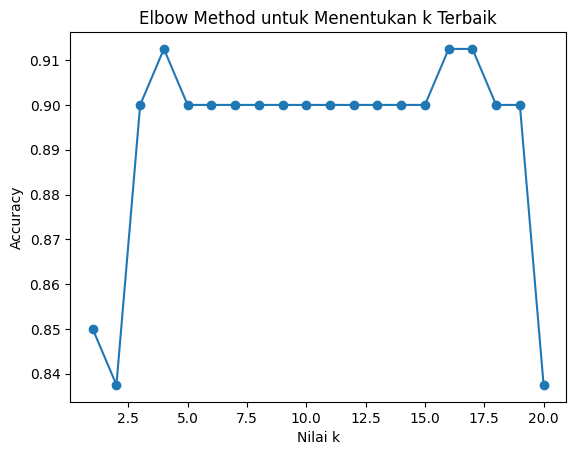

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Nilai k')
plt.ylabel('Accuracy')
plt.title('Elbow Method untuk Menentukan k Terbaik')
plt.show()

In [24]:
best_k = k_values[accuracies.index(max(accuracies))]
print("Nilai k terbaik:", best_k)

Nilai k terbaik: 4


In [26]:
knn_best = KNeighborsClassifier(
    n_neighbors=best_k,
    metric='euclidean'
)

knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)

In [27]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

EVALUASI & PERBANDINGAN MODEL

In [28]:
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_nb  = accuracy_score(y_test, y_pred_nb)

print("Accuracy KNN :", acc_knn)
print("Accuracy NB  :", acc_nb)

Accuracy KNN : 0.9125
Accuracy NB  : 0.875


In [29]:
from sklearn.metrics import classification_report

print("=== KNN ===")
print(classification_report(y_test, y_pred_knn))

print("=== Naive Bayes ===")
print(classification_report(y_test, y_pred_nb))

=== KNN ===
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        51
           1       0.87      0.90      0.88        29

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80

=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        51
           1       0.85      0.79      0.82        29

    accuracy                           0.88        80
   macro avg       0.87      0.86      0.86        80
weighted avg       0.87      0.88      0.87        80



In [30]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix KNN")
print(confusion_matrix(y_test, y_pred_knn))

print("Confusion Matrix Naive Bayes")
print(confusion_matrix(y_test, y_pred_nb))

Confusion Matrix KNN
[[47  4]
 [ 3 26]]
Confusion Matrix Naive Bayes
[[47  4]
 [ 6 23]]


In [35]:
import joblib

save_path = '/content/drive/MyDrive/model' # Define a path to save the models

joblib.dump(knn_best, f'{save_path}/model_knn.pkl')
joblib.dump(nb, f'{save_path}/model_naive_bayes.pkl') # Corrected nb_model to nb
joblib.dump(scaler, f'{save_path}/scaler.pkl')
joblib.dump(best_k, f'{save_path}/best_k_knn.pkl')

print("Semua model berhasil disimpan ke Google Drive")

Semua model berhasil disimpan ke Google Drive
